- 모델링에 가장 적합한 확률분포는 정규분포이나 실제로 많은 변수가 특정방향으로 치우쳐 있음
- 한쪽으로 치우친 변수에서 치우친 반대 방향의 값(꼬리부분)들이 이상치처럼 작용할 수 있으므로, 이러한 치우침을 제거해야 함

### 탐색방법 : 왜도(skewness)

- 변수 치우침을 확인하기 가장 적절한 척도로는 왜도가 있음
- 왜도
    - 분포의 비대칭도를 나타내는 통계량
    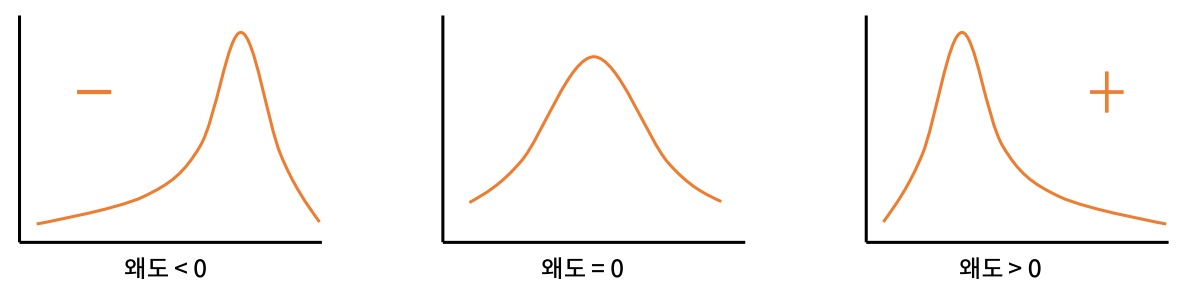
    
    - 왜도의 절대값이 <b> 1.5이상 </b> 이면 치우쳤다고 판단

In [3]:
import pandas as pd
df = pd.read_csv('./데이터/sonar.csv', header=None) # 컬럼명(header)가 없음

In [5]:
df.head()
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [7]:
# 컬럼을 구분하기 위해 컬럼명 임의 생성
columns = ['band' + str(i) for i in range(1,61)]
columns.append('Y')

# columns

In [8]:
df.columns = columns

In [9]:
df.head(1)

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band52,band53,band54,band55,band56,band57,band58,band59,band60,Y
0,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R


In [10]:
# 
X = df.drop('Y', axis=1)
Y = df['Y']

In [11]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, TestX, Train_Y, Test_Y = train_test_split(X, Y, random_state=4)

In [13]:
# 모든 컬럼의 왜도 확인
Train_X.skew()
# band4의 왜도가 가장 큼 => 그래프로 확인

band1     2.122757
band2     2.206600
band3     2.980038
band4     3.765729
band5     2.316077
band6     1.319739
band7     0.995473
band8     1.391214
band9     1.659002
band10    1.421497
band11    1.115515
band12    0.647377
band13    0.753832
band14    1.131916
band15    0.887139
band16    0.671871
band17    0.677022
band18    0.636263
band19    0.366953
band20    0.012580
band21   -0.160018
band22   -0.421629
band23   -0.613929
band24   -0.651260
band25   -0.753808
band26   -0.604019
band27   -0.634036
band28   -0.684365
band29   -0.539911
band30   -0.188124
band31    0.208961
band32    0.252053
band33    0.360365
band34    0.509935
band35    0.543931
band36    0.581213
band37    0.660349
band38    0.929952
band39    0.897142
band40    0.909556
band41    0.874074
band42    0.866778
band43    0.921569
band44    1.295647
band45    1.274154
band46    1.611226
band47    1.794758
band48    1.201152
band49    1.274165
band50    1.764850
band51    2.907184
band52    2.189543
band53    1.

<AxesSubplot:>

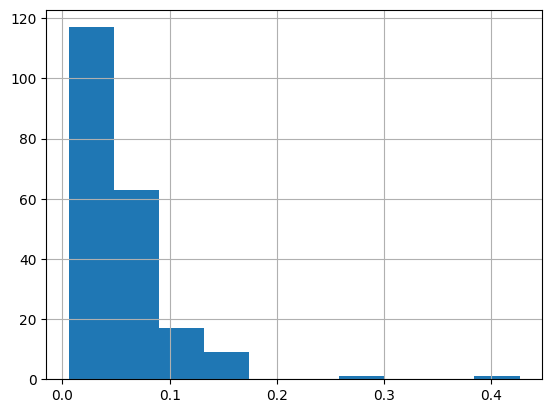

In [15]:
%matplotlib inline
df['band4'].hist()

#### 치우침 제거

In [16]:
# 왜도 기반 치우친 변수 제거
import numpy as np
bias = Train_X.columns[Train_X.skew().abs() > 1.5]
# Train_X.skew().abs() > 1.5

bias

Index(['band1', 'band2', 'band3', 'band4', 'band5', 'band9', 'band46',
       'band47', 'band50', 'band51', 'band52', 'band55', 'band56', 'band57',
       'band58', 'band59', 'band60'],
      dtype='object')

### 왜도 제거
- log2변환을 진행함
- np.log2()

In [17]:
Train_X[bias]

,band1,band2,band3,band4,band5,band9,band46,band47,band50,band51,band52,band55,band56,band57,band58,band59,band60
82,0.0409,0.0421,0.0573,0.0130,0.0183,0.2302,0.2732,0.1874,0.0405,0.0113,0.0028,0.0120,0.0087,0.0061,0.0061,0.0030,0.0078
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.1030,0.0080,0.0790,0.0179,0.0051,0.0061,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
12,0.0079,0.0086,0.0055,0.0250,0.0344,0.1009,0.0663,0.1202,0.0266,0.0174,0.0176,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032
142,0.0526,0.0563,0.1219,0.1206,0.0246,0.2291,0.5123,0.3385,0.0270,0.0380,0.0339,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208
116,0.0094,0.0333,0.0306,0.0376,0.1296,0.1870,0.1097,0.1173,0.0281,0.0216,0.0153,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.1371,0.1226,0.1385,0.1484,0.1776,0.1630,0.1062,0.0643,0.0272,0.0171,0.0118,0.0065,0.0067,0.0022,0.0079,0.0146,0.0051
197,0.0366,0.0421,0.0504,0.0250,0.0596,0.1419,0.1985,0.1570,0.0194,0.0166,0.0132,0.0059,0.0016,0.0025,0.0017,0.0027,0.0027
183,0.0096,0.0404,0.0682,0.0688,0.0887,0.2546,0.2216,0.1401,0.0134,0.0310,0.0237,0.0170,0.0012,0.0109,0.0036,0.0043,0.0018
174,0.0191,0.0173,0.0291,0.0301,0.0463,0.2423,0.3639,0.2069,0.0267,0.0125,0.0040,0.0172,0.0132,0.0110,0.0122,0.0114,0.0068


<AxesSubplot:>

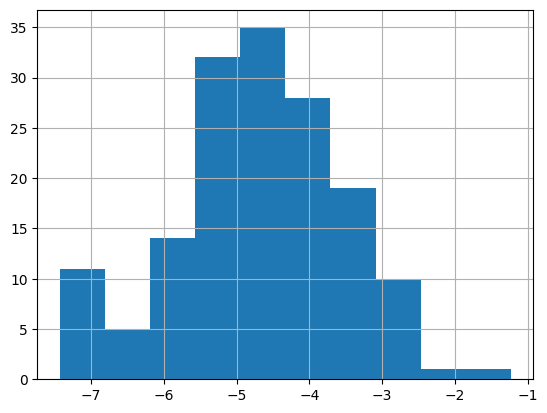

In [19]:
np.log2(Train_X[bias])['band4'].hist()

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


<AxesSubplot:>

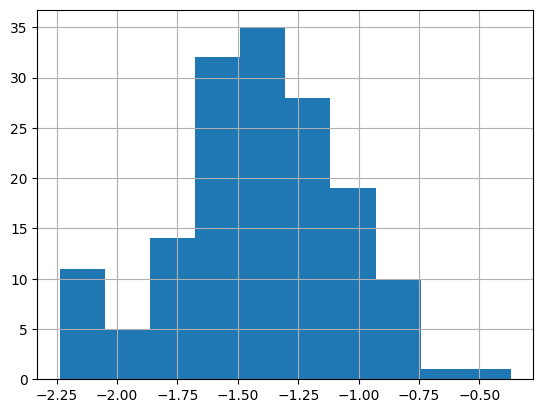

In [20]:
np.log10(Train_X[bias])['band4'].hist()

In [21]:
Train_X[bias] = np.log10(Train_X[bias])

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [22]:
Train_X.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band51,band52,band53,band54,band55,band56,band57,band58,band59,band60
82,-1.388277,-1.375718,-1.241845,-1.886057,-1.737549,0.1019,0.1054,0.1070,-0.637895,0.2259,...,-1.946922,-2.552842,0.0036,0.0105,-1.920819,-2.060481,-2.214670,-2.214670,-2.522879,-2.107905
204,-1.490797,-1.995679,-1.525784,-1.248721,-1.119186,0.0958,0.0990,0.1018,-0.987163,0.2154,...,-2.292430,-2.214670,0.0093,0.0135,-2.200659,-2.200659,-2.468521,-2.494850,-2.207608,-2.173925
12,-2.102373,-2.065502,-2.259637,-1.602060,-1.463442,0.0546,0.0528,0.0958,-0.996109,0.1240,...,-1.759451,-1.754487,0.0127,0.0088,-2.008774,-2.721246,-2.229148,-2.236572,-2.229148,-2.494850
142,-1.279014,-1.249492,-0.913996,-0.918653,-1.609065,0.1022,0.0539,0.0439,-0.639975,0.1632,...,-1.420216,-1.469800,0.0149,0.0335,-1.424812,-1.759451,-1.879426,-1.987163,-1.438899,-1.681937
116,-2.026872,-1.477556,-1.514279,-1.424812,-0.887395,0.1795,0.1909,0.1692,-0.728158,0.1725,...,-1.665546,-1.815309,0.0112,0.0241,-1.785156,-2.259637,-2.107905,-2.259637,-2.040959,-2.173925


### log 변환되어야 하는 데이터
- 왜도가 심한 데이터
- 돈과 관련된 데이터